In [2]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
df_DA_us = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

In [4]:
df_DA_us = df_DA_us.dropna(subset=['salary_year_avg'])

<Axes: >

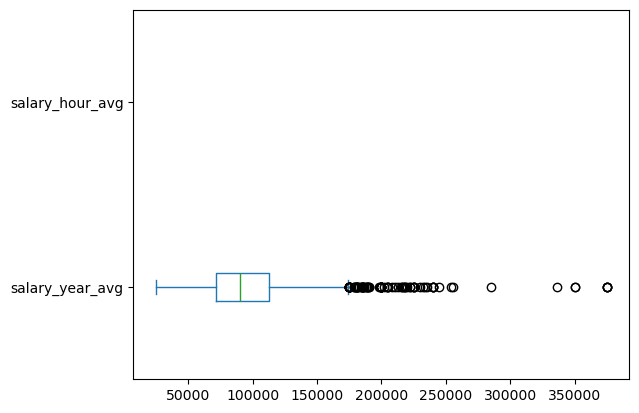

In [5]:
df_DA_us.plot(kind='box', vert=False)

/var/folders/y6/0qzxmvxs4tj502z8bfcn0gy00000gn/T/ipykernel_26315/465539360.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


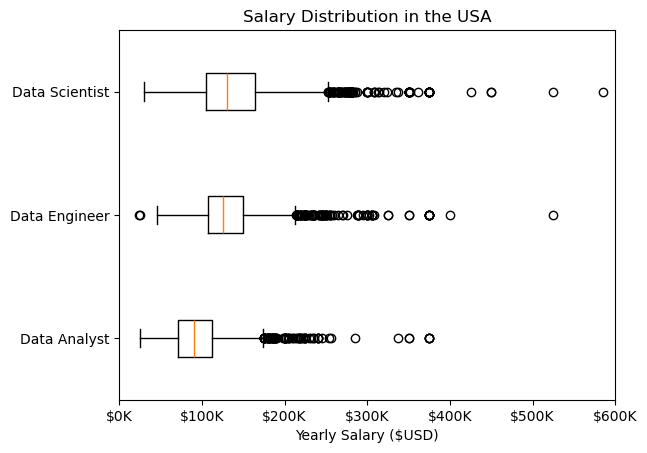

In [6]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_us = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()

df_us = df_us.dropna(subset='salary_year_avg')

job_list = [df_us[df_us['job_title_short']== job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary Distribution in the USA')
plt.xlabel('Yearly Salary ($USD)')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0, 600000)
plt.show()

# Practice Problems

/var/folders/y6/0qzxmvxs4tj502z8bfcn0gy00000gn/T/ipykernel_26315/1444019665.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=labels,vert=False)


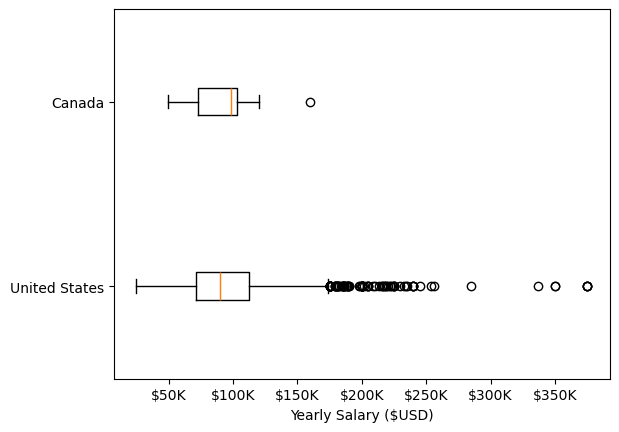

In [9]:
countries = ['United States', 'Canada']

df_DA_comp = df[(df['job_title_short'] == "Data Analyst") & (df['job_country'].isin(countries))].copy()

df_DA_comp = df_DA_comp.dropna(subset='salary_year_avg')

us_salaries = df_DA_comp[df_DA_comp['job_country']== 'United States']['salary_year_avg'] 

canada_salaries = df_DA_comp[df_DA_comp['job_country']== 'Canada']['salary_year_avg'] 

data_to_plot = [us_salaries, canada_salaries]
labels = ['United States', 'Canada']

plt.boxplot(data_to_plot, labels=labels,vert=False)

plt.xlabel('Yearly Salary ($USD)')
plt.ylabel
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.show()